<a href="https://colab.research.google.com/github/soyeon-kang/2022_ML_Eng/blob/main/%5BDay_1_1_(solution)%5D_Convolution_Gaussian_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. classical computer vision / image processing 을 위한 함수 직접 사용
2. 같은 기능을 가지는 다양한 패키지 사용 및 장,단점 비교
3. 결과 이미지 plotting
4. computer vision 알고리즘 구현

# **Convolution & Gaussian smoothing**
In this notebook, we will see how to denoise corrupted images using various convolutional filters.


In [ ]:
# import packages
import numpy as np
import cv2
from PIL import Image
from skimage.util import random_noise

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["image.cmap"] = 'gray'  # fix color map to gray

Let's download a sample gray scale image from the internet.

In [ ]:
!wget 'https://people.sc.fsu.edu/~jburkardt/data/png/baboon.png'

--2022-05-16 23:42:33--  https://people.sc.fsu.edu/~jburkardt/data/png/baboon.png
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.16.102
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.16.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238716 (233K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 233.12K  1.46MB/s    in 0.2s    

2022-05-16 23:42:33 (1.46 MB/s) - ‘baboon.png’ saved [238716/238716]



img array size (H,W) : (512, 512)


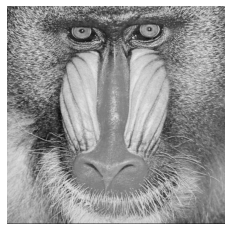

In [ ]:
# TODO 1. Load the downloaded image into the memory
input_image = Image.open('baboon.png')
input_array = np.asarray(input_image)

print('img array size (H,W) : {}'.format(input_array.shape))
plt.imshow(input_image)
plt.axis('off')
plt.show()

# **Basic Convolution**
You can build your own filter and apply it to an image using the `filter2D` function.

`dst=cv2.filter2D(src, ddepth, kernel)`
*   ``` src ```: input image
*   ``` ddepth ```: output image depth
*   ``` kernel ```: convolutional kernel, a single-channel floating point matrix

Let's create the 5x5 averaging kernel and apply to the sample image!

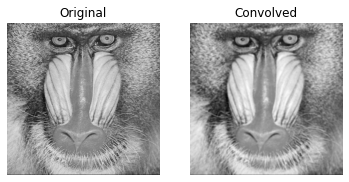

In [ ]:
input_array = np.asarray(input_image)

# 5x5 average kernel with dtype of float 32
kernel = np.ones((5,5), np.float32) / 25.  # 25 is used for normalizing the kernel so that sum of it equals 1.

# TODO 1. call the filter2D function with the given kerenl.
output_array = cv2.filter2D(input_array, -1, kernel)

plt.subplot(1, 2, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 2, 2); plt.title('Convolved'); plt.axis('off');
plt.imshow(output_array);
plt.show()

# **1. Averaging**
`dst=cv2.boxFilter(src, ddepth, ksize, normalize)`
*   ``` src ```: input image
*   ``` ddepth ```: output image depth
*   ``` ksize ```: blurring kernel size
*   ``` normalize ```: flag, specifying whether the kernel is normalized by its area or not.

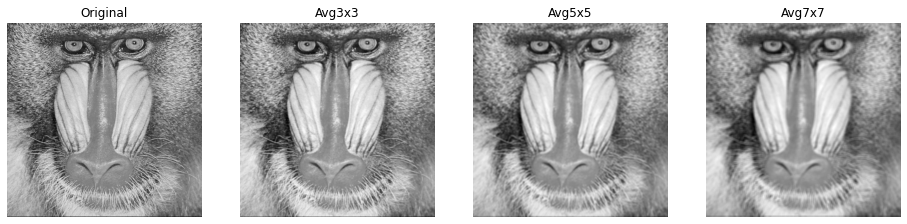

In [ ]:
input_iamge = Image.open('baboon.png')
input_array = np.asarray(input_image)

# TODO 1. apply boxFilter with the window size of 3,3
avg_3x3_array = cv2.boxFilter(input_array, -1, (3,3), normalize=True)
# TODO 2. apply boxFilter with the window size of 5,5
avg_5x5_array = cv2.boxFilter(input_array, -1, (5,5), normalize=True)
# TODO 3. apply boxFilter with the window size of 7,7
avg_7x7_array = cv2.boxFilter(input_array, -1, (7,7), normalize=True)

# TODO 4. plot results
plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Avg3x3'); plt.axis('off');
plt.imshow(avg_3x3_array);
plt.subplot(1, 4, 3); plt.title('Avg5x5'); plt.axis('off');
plt.imshow(avg_5x5_array);
plt.subplot(1, 4, 4); plt.title('Avg7x7'); plt.axis('off');
plt.imshow(avg_7x7_array);
plt.show()

`dst=random_noise(src, mode, amount)`
- `src`: input image
- `mode`: corruption mode (gaussian, salt, pepper, s&p)
- `amount`: proportion of image pixels to replace with noise on range [0, 1]. Used in `'salt', 'pepper', and 's&p'`
- `mean`: Mean of random distribution. Used in `‘gaussian’`
- `var`: Variance of random distribution. Used in `‘gaussian’`


**random noise는 0\~1사이의 값을 값는 float data type 의 corrupted array를 반환. 결과 이미지는 0~255를 갖는 int array로 다시 변활할 필요가 있음**

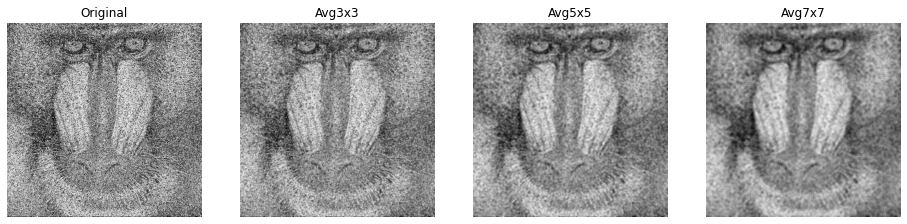

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. corrupt the input_array (e.g. noise type: salt and pepper, noise amount: 0.3)
input_array = random_noise(input_array, mode='s&p',amount=0.3)
# TODO 2. convert data type from flat to int
input_array = (input_array * 255).astype(np.uint8)

# TODO 3. apply boxFilter with the window size of 3
avg_3x3_array = cv2.boxFilter(input_array, -1, (3,3), normalize=True)
# TODO 4. apply boxFilter with the window size of 5
avg_5x5_array = cv2.boxFilter(input_array, -1, (5,5), normalize=True)
# TODO 5. apply boxFilter with the window size of 7
avg_7x7_array = cv2.boxFilter(input_array, -1, (7,7), normalize=True)

# TODO 6. plot results
plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Avg3x3'); plt.axis('off');
plt.imshow(avg_3x3_array);
plt.subplot(1, 4, 3); plt.title('Avg5x5'); plt.axis('off');
plt.imshow(avg_5x5_array);
plt.subplot(1, 4, 4); plt.title('Avg7x7'); plt.axis('off');
plt.imshow(avg_7x7_array);
plt.show()

# **2. Gaussian Filtering**
`dst	=	cv2.GaussianBlur(src, ksize, sigmaX, sigmaY)`
*   ``` src ```: input image
*   ``` ksize ```: Gaussian kernel size.
*   ``` sigmaX	 ```: Gaussian kernel standard deviation in X direction.
*   ``` sigmaY	 ```: Gaussian kernel standard deviation in Y direction.

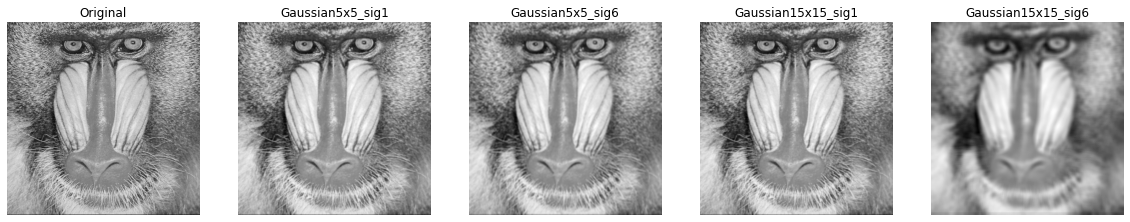

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. apply GaussianFilter with the window size of 5, sigma of 1
gaussian_5x5_sig1_array = cv2.GaussianBlur(input_array,(5,5),1,1)
# TODO 2. apply GaussianFilter with the window size of 5, sigma of 6
gaussian_5x5_sig6_array = cv2.GaussianBlur(input_array,(5,5),6,6)
# TODO 3. apply GaussianFilter with the window size of 15, sigma of 1
gaussian_15x15_sig1_array = cv2.GaussianBlur(input_array,(15,15),1,1)
# TODO 4. apply GaussianFilter with the window size of 15, sigma of 6
gaussian_15x15_sig6_array = cv2.GaussianBlur(input_array,(15,15),6,6)

# TODO 5. plot results
plt.figure(figsize=(20,4))
plt.subplot(1, 5, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 5, 2); plt.title('Gaussian5x5_sig1'); plt.axis('off');
plt.imshow(gaussian_5x5_sig1_array);
plt.subplot(1, 5, 3); plt.title('Gaussian5x5_sig6'); plt.axis('off');
plt.imshow(gaussian_5x5_sig6_array);
plt.subplot(1, 5, 4); plt.title('Gaussian15x15_sig1'); plt.axis('off');
plt.imshow(gaussian_15x15_sig1_array);
plt.subplot(1, 5, 5); plt.title('Gaussian15x15_sig6'); plt.axis('off');
plt.imshow(gaussian_15x15_sig6_array);
plt.show()

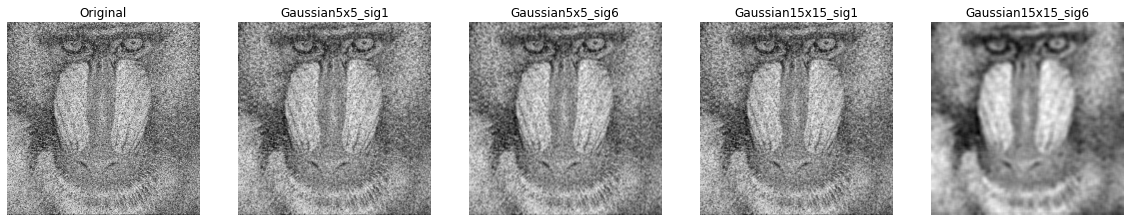

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. corrupt the input_array (e.g. noise type: salt and pepper, noise amount: 0.3)
input_array = random_noise(input_array, mode='s&p',amount=0.3)
input_array = (input_array * 255).astype(np.uint8)  # convert dtype as uint8

# TODO 2. apply GaussianFilter with the window size of 5, sigma of 1
gaussian_5x5_sig1_array = cv2.GaussianBlur(input_array,(5,5),1,1)
# TODO 3. apply GaussianFilter with the window size of 5, sigma of 6
gaussian_5x5_sig6_array = cv2.GaussianBlur(input_array,(5,5),6,6)
# TODO 4. apply GaussianFilter with the window size of 15, sigma of 1
gaussian_15x15_sig1_array = cv2.GaussianBlur(input_array,(15,15),1,1)
# TODO 5. apply GaussianFilter with the window size of 15, sigma of 6
gaussian_15x15_sig6_array = cv2.GaussianBlur(input_array,(15,15),6,6)

# TODO 6. plot results
plt.figure(figsize=(20,4))
plt.subplot(1, 5, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 5, 2); plt.title('Gaussian5x5_sig1'); plt.axis('off');
plt.imshow(gaussian_5x5_sig1_array);
plt.subplot(1, 5, 3); plt.title('Gaussian5x5_sig6'); plt.axis('off');
plt.imshow(gaussian_5x5_sig6_array);
plt.subplot(1, 5, 4); plt.title('Gaussian15x15_sig1'); plt.axis('off');
plt.imshow(gaussian_15x15_sig1_array);
plt.subplot(1, 5, 5); plt.title('Gaussian15x15_sig6'); plt.axis('off');
plt.imshow(gaussian_15x15_sig6_array);
plt.show()

# **3. Median Filtering**
`dst	=	cv2.medianBlur(src, ksize)`
*   ``` src ```: input image
*   ``` ksize ```: aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

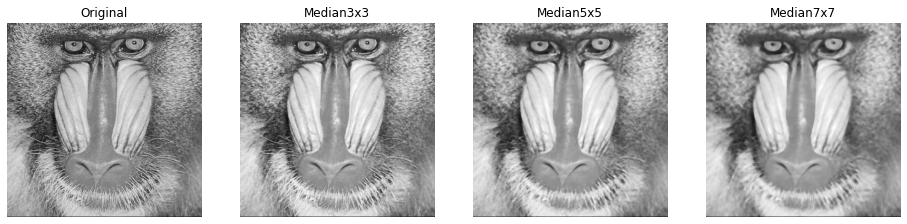

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. MedianFilter with the window size of 3
median_3x3_array = cv2.medianBlur(input_array, 3)
# TODO 2. MedianFilter with the window size of 5
median_5x5_array = cv2.medianBlur(input_array, 5)
# TODO 3. MedianFilter with the window size of 7
median_7x7_array = cv2.medianBlur(input_array, 7)

# TODO 4. plot results
plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Median3x3'); plt.axis('off');
plt.imshow(median_3x3_array);
plt.subplot(1, 4, 3); plt.title('Median5x5'); plt.axis('off');
plt.imshow(median_5x5_array);
plt.subplot(1, 4, 4); plt.title('Median7x7'); plt.axis('off');
plt.imshow(median_7x7_array);
plt.show()

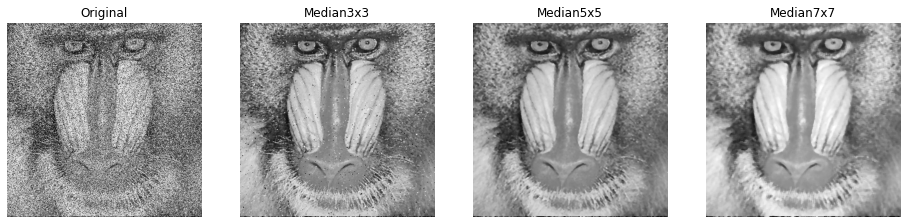

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. corrupt the input_array (e.g. noise type: salt and pepper, noise amount: 0.3)
input_array = random_noise(input_array, mode='s&p',amount=0.3)
input_array = (input_array * 255).astype(np.uint8)  # convert dtype as uint8

# TODO 2. MedianFilter with the window size of 3
median_3x3_array = cv2.medianBlur(input_array, 3)
# TODO 3. MedianFilter with the window size of 5
median_5x5_array = cv2.medianBlur(input_array, 5)
# TODO 4. MedianFilter with the window size of 7
median_7x7_array = cv2.medianBlur(input_array, 7)

# TODO 5. plot results
plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Median3x3'); plt.axis('off');
plt.imshow(median_3x3_array);
plt.subplot(1, 4, 3); plt.title('Median5x5'); plt.axis('off');
plt.imshow(median_5x5_array);
plt.subplot(1, 4, 4); plt.title('Median7x7'); plt.axis('off');
plt.imshow(median_7x7_array);
plt.show()

---

# **Practice: Build your own kernel**

Write down custom functions which return 

1.   Averaging kernel
2.   Gaussian kernel
3.   Median filtered image


In [ ]:
from typing import Tuple  # for type hint

---
Averaging function (assume we always want *normalized kernels*).

`input`
- kernel size: (tuple of int)

`output`
- averaging kernel: (numpy array)



In [ ]:
def Averaging(kernel_size: Tuple[int, int]) -> np.array:
  #kernel = np.empty() # dummy object
  """
  Your code
  """
  kernel = np.ones(kernel_size)
  kernel = kernel / np.sum(kernel)
  return kernel

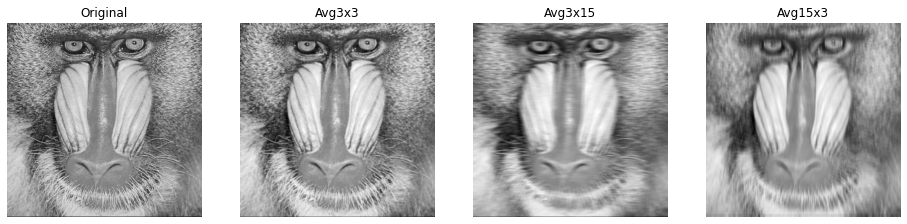

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. instantiate 3x3 averaging kernel
avg_3x3_kernel = Averaging((3, 3))
# TODO 2. instantiate 3x15 averaging kernel
avg_3x15_kernel = Averaging((3, 15))
# TODO 3. instantiate 15x3 averaging kernel
avg_15x3_kernel = Averaging((15, 3))

# TODO 4. apply 3x3 averaging kernel to input_array
avg_3x3_array = cv2.filter2D(input_array, -1, avg_3x3_kernel)
# TODO 5. apply 3x15 averaging kernel to input_array
avg_3x15_array = cv2.filter2D(input_array, -1, avg_3x15_kernel)
# TODO 6. apply 15x3 averaging kernel to input_array
avg_15x3_array = cv2.filter2D(input_array, -1, avg_15x3_kernel)

plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Avg3x3'); plt.axis('off');
plt.imshow(avg_3x3_array);
plt.subplot(1, 4, 3); plt.title('Avg3x15'); plt.axis('off');
plt.imshow(avg_3x15_array);
plt.subplot(1, 4, 4); plt.title('Avg15x3'); plt.axis('off');
plt.imshow(avg_15x3_array);
plt.show()

---
Gaussian function (only consider *square kernel* size & *isotropic gaussian* distributions).

2D Gaussian eq: $C * e^{-({x^{2} + y^{2})}\over{2\sigma^{2}}}$, where $C$ is normalization value


`input`
- kernel size: (int)
- std: (float)

`output`:
- gaussian kernel: (numpy array)

In [ ]:
import math

def Gaussian(kernel_size: int, std: float) -> np.array:
  #kernel = np.empty() # dummy object
  """
  Your code
  """
  kernel = np.zeros((kernel_size, kernel_size))

  gaussian_eq = lambda x,y: (math.e ** (-1 / (2 * (std ** 2)) * ((x ** 2) + (y ** 2))))

  x_origin = (kernel_size - 1) / 2.
  y_origin = (kernel_size - 1) / 2.
  
  for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
      x_pos = abs(x_origin - i)
      y_pos = abs(y_origin - j)

      kernel[i][j] = gaussian_eq(x_pos, y_pos)

  kernel /= np.sum(kernel)
  return kernel

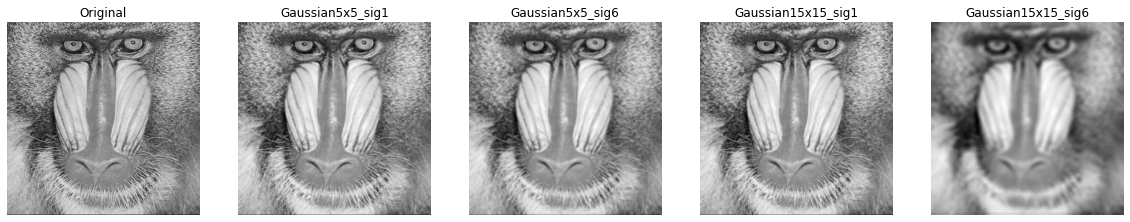

In [ ]:
input_array = np.asarray(input_image)

# TODO 1. instantiate gaussian kernel (window size of 5, std 1)
gaussian_5x5_sig1_kernel = Gaussian(5, 1)
# TODO 2. instantiate gaussian kernel (window size of 5, std 6)
gaussian_5x5_sig6_kernel = Gaussian(5, 6)
# TODO 3. instantiate gaussian kernel (window size of 15, std 1)
gaussian_15x15_sig1_kernel = Gaussian(15, 1)
# TODO 4. instantiate gaussian kernel (window size of 15, std 6)
gaussian_15x15_sig6_kernel = Gaussian(15, 6)

# TODO 5. apply gaussian kernel (window size of 5, std 1) to input_array
gaussian_5x5_sig1_array = cv2.filter2D(input_array, -1, gaussian_5x5_sig1_kernel)
# TODO 6. apply gaussian kernel (window size of 5, std 6) to input_array
gaussian_5x5_sig6_array = cv2.filter2D(input_array, -1, gaussian_5x5_sig6_kernel)
# TODO 7. apply gaussian kernel (window size of 15, std 1) to input_array
gaussian_15x15_sig1_array = cv2.filter2D(input_array, -1, gaussian_15x15_sig1_kernel)
# TODO 8. apply gaussian kernel (window size of 15, std 6) to input_array
gaussian_15x15_sig6_array = cv2.filter2D(input_array, -1, gaussian_15x15_sig6_kernel)

plt.figure(figsize=(20,4))
plt.subplot(1, 5, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 5, 2); plt.title('Gaussian5x5_sig1'); plt.axis('off');
plt.imshow(gaussian_5x5_sig1_array);
plt.subplot(1, 5, 3); plt.title('Gaussian5x5_sig6'); plt.axis('off');
plt.imshow(gaussian_5x5_sig6_array);
plt.subplot(1, 5, 4); plt.title('Gaussian15x15_sig1'); plt.axis('off');
plt.imshow(gaussian_15x15_sig1_array);
plt.subplot(1, 5, 5); plt.title('Gaussian15x15_sig6'); plt.axis('off');
plt.imshow(gaussian_15x15_sig6_array);
plt.show()

---
Median function (only consider *square kernel* size)

*Extend border values outside with 0s

`input`
- input_image: (numpy array)
- kernel size: (int)

`output`:
- median filtered image: (numpy array)


Illustration of median filtering (no-pad).
![image.png](https://upload.wikimedia.org/wikipedia/commons/a/ae/Median_filter_2D.gif)

In [ ]:
def zero_padding(input_image: np.array, kernel_size: int) -> np.array:
  # Pad image so that kernel could be applied anywhere in the image.
  pad_size = (kernel_size - 1) // 2
  zero_pad_image = np.zeros((2 * pad_size + input_image.shape[0], 2 * pad_size + input_image.shape[1]))
  zero_pad_image[pad_size:-pad_size, pad_size:-pad_size] = input_image
  return zero_pad_image

In [ ]:
def Median(input_image: np.array, kernel_size: int) -> np.array:
  assert kernel_size % 2 != 0, "kernel size must be odd"
  """
  Your code
  """
  zero_pad_image = zero_padding(input_image, kernel_size)
  output_image = np.empty_like(input_image)
  
  for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
      output_image[i, j] = np.median(zero_pad_image[i: i+kernel_size, j: j+kernel_size], axis=(0,1))

  return output_image

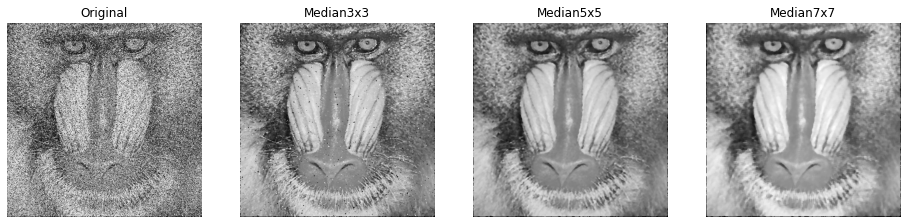

In [ ]:
input_array = np.asarray(input_image)
# TODO 1. corrupt the input_array (e.g. noise type: salt and pepper, noise amount: 0.3)
input_array = random_noise(input_array, mode='s&p',amount=0.3)  # image corrupting (salt & pepper)
input_array = (input_array * 255).astype(np.uint8)  # convert dtype as uint8

# TODO 2. apply median filter (window size of 3) to input_array
median_3x3_array = Median(input_array, 3)
# TODO 3. apply median filter (window size of 5) to input_array
median_5x5_array = Median(input_array, 5)
# TODO 4. apply median filter (window size of 7) to input_array
median_7x7_array = Median(input_array, 7)

plt.figure(figsize=(16,4))
plt.subplot(1, 4, 1); plt.title('Original'); plt.axis('off');
plt.imshow(input_array);
plt.subplot(1, 4, 2); plt.title('Median3x3'); plt.axis('off');
plt.imshow(median_3x3_array);
plt.subplot(1, 4, 3); plt.title('Median5x5'); plt.axis('off');
plt.imshow(median_5x5_array);
plt.subplot(1, 4, 4); plt.title('Median7x7'); plt.axis('off');
plt.imshow(median_7x7_array);
plt.show()

---

### Reference

Please see the following official tutorials for more detailed explanation.

 - [Smothing Images — OpenCV documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)